In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [85]:
df = pd.read_csv("48_Lev_corr_Temp_fault_seed_199_vars_23.csv")

In [86]:
df

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,283.149994,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1,1.0,0.0,0.0,0.0,283.149994,283.163330,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
2,2.0,0.0,0.0,0.0,283.149994,283.176666,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
3,3.0,0.0,0.0,0.0,283.149994,283.189972,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
4,4.0,0.0,0.0,0.0,283.149994,283.203247,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204613,199997.0,2.7,0.0,0.0,311.282806,326.177246,2.688000,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.112000,0.0,90.874657,1.058382
204614,199998.0,2.7,0.0,0.0,311.282806,323.609467,2.664904,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.135096,0.0,90.874657,1.058382
204615,199999.0,2.7,0.0,0.0,311.282806,321.792908,2.641813,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.158187,0.0,90.874657,1.058382
204616,200000.0,2.7,0.0,0.0,311.282806,320.440308,2.618726,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.181274,0.0,90.874657,1.058382


Посмотрим есть ли повторяющиеся значения времени

In [87]:
count=0
for i in df["Time"].duplicated():
    if i == True:
        count+=1
print(count)

2992


Посмотрим есть ли пропуски

In [88]:
count=1
for i in df["Time"].isnull():
    if i == True:
        count+=1
print(count)

1


Удалим дубликаты

In [89]:
df1 = df.drop_duplicates(keep = False, subset = ["Time"])

In [90]:
df1

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,0.0,0.0,0.0,0.0,283.149994,283.149994,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1,1.0,0.0,0.0,0.0,283.149994,283.163330,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
2,2.0,0.0,0.0,0.0,283.149994,283.176666,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
3,3.0,0.0,0.0,0.0,283.149994,283.189972,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
4,4.0,0.0,0.0,0.0,283.149994,283.203247,0.500000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204607,199995.0,2.7,0.0,0.0,311.282806,328.050201,2.700000,0.0,1.058382,0.0,...,0.0,0.0,-0.912534,1.793499,330.057159,0.0,0.100000,0.0,90.874657,1.058382
204608,199996.0,2.7,0.0,0.0,311.282806,328.003632,2.700000,0.0,1.058382,0.0,...,0.0,0.0,-0.912534,1.793499,330.057159,0.0,0.100000,0.0,90.874657,1.058382
204613,199997.0,2.7,0.0,0.0,311.282806,326.177246,2.688000,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.112000,0.0,90.874657,1.058382
204614,199998.0,2.7,0.0,0.0,311.282806,323.609467,2.664904,0.0,1.058382,0.0,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.135096,0.0,90.874657,1.058382


Проверим есть ли теперь дубликаты

In [91]:
count=0
for i in df1["Time"].duplicated():
    if i == True:
        count+=1
print(count)

0


In [92]:
df1 = df1.reset_index(drop=True)

In [93]:
for i in df1["Time"]:
    df1["Time"][i] = datetime.fromtimestamp(i).strftime("%Y-%m-%d %I:%M:%S")

C:\Users\PC\AppData\Local\Temp\ipykernel_10656\2967639336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Time"][i] = datetime.fromtimestamp(i).strftime("%Y-%m-%d %I:%M:%S")
C:\Users\PC\AppData\Local\Temp\ipykernel_10656\2967639336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Time"][i] = datetime.fromtimestamp(i).strftime("%Y-%m-%d %I:%M:%S")
C:\Users\PC\AppData\Local\Temp\ipykernel_10656\2967639336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [94]:
df1.head()

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
0,1970-01-01 03:00:00,0.0,0.0,0.0,283.149994,283.149994,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
1,1970-01-01 03:00:01,0.0,0.0,0.0,283.149994,283.163330,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
2,1970-01-01 03:00:02,0.0,0.0,0.0,283.149994,283.176666,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
3,1970-01-01 03:00:03,0.0,0.0,0.0,283.149994,283.189972,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0
4,1970-01-01 03:00:04,0.0,0.0,0.0,283.149994,283.203247,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.01,273.149994,0.0,0.1,0.0,100.0,0.0


In [95]:
df1['Time'] = df1['Time'].astype('datetime64[ns]')

In [82]:
# df1.set_index("Time",inplace=True)
# df1

,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,limiter.y,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 03:00:00,0.0,0.0,0.0,283.149994,283.149994,0.500000,0.0,0.000000,0.0,283.000000,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1970-01-01 03:00:01,0.0,0.0,0.0,283.149994,283.163330,0.500000,0.0,0.000000,0.0,283.000000,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1970-01-01 03:00:02,0.0,0.0,0.0,283.149994,283.176666,0.500000,0.0,0.000000,0.0,283.000000,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1970-01-01 03:00:03,0.0,0.0,0.0,283.149994,283.189972,0.500000,0.0,0.000000,0.0,283.000000,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
1970-01-01 03:00:04,0.0,0.0,0.0,283.149994,283.203247,0.500000,0.0,0.000000,0.0,283.000000,...,0.0,0.0,0.000000,0.010000,273.149994,0.0,0.100000,0.0,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-03 10:32:56,2.7,0.0,0.0,311.282806,328.050201,2.700000,0.0,1.058382,0.0,293.583832,...,0.0,0.0,-0.912534,1.793499,330.057159,0.0,0.100000,0.0,90.874657,1.058382
1970-01-03 10:32:57,2.7,0.0,0.0,311.282806,328.003632,2.700000,0.0,1.058382,0.0,293.583832,...,0.0,0.0,-0.912534,1.793499,330.057159,0.0,0.100000,0.0,90.874657,1.058382
1970-01-03 10:32:58,2.7,0.0,0.0,311.282806,326.177246,2.688000,0.0,1.058382,0.0,293.583832,...,0.0,1.0,-0.912534,1.793499,330.057159,0.0,0.112000,0.0,90.874657,1.058382


Сохраним этот датафрейм для последующей работы с ним

In [97]:
df1.to_csv('pred_new_48_Lev_corr_Temp_fault_seed_199_vars_23.csv',index=False)

Список сокращений:

Приемный бак (RT)

Нагревательный бак (HT)

Коллекторный бак (CT)

RT_level - датчики уровня жидкости в RT

RT_temperature.T - температура RT

HT_temperature.T - температура HT

C_temperature.T - температура CT

inj_valve_act включение/выключение источника газойля

heater_act - включение/выключение нагревателя


In [13]:
df1.columns

Index(['Time', 'RT_level_ini', 'DANGER', 'FAULT', 'RT_temperature.T',
       'HT_temperature.T', 'RT_level', 'out_valve_act', 'dT_rand',
       'inv_valve_act', 'limiter.y', 'inj_valve_act', 'Relaxing.active',
       'boundary.m_flow_in', 'dir_valve_act', 'dt_rand', 'C_level',
       'C_temperature.T', 'heater_act', 'HT_level', 'ATTACK', 'limiter1.y',
       'dL_rand'],
      dtype='object')

#### Ключевые признаки:

RT_level

HT_temperature.T

inj_valve_act

heater_act

<AxesSubplot:>

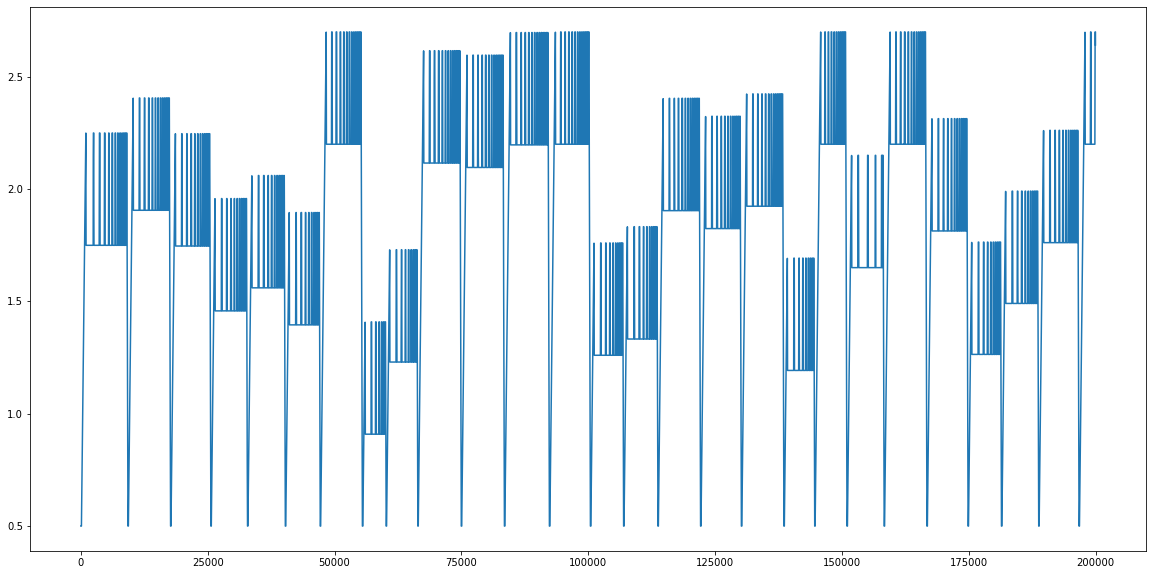

In [14]:
df1["RT_level"].plot(figsize=(20,10))

<AxesSubplot:>

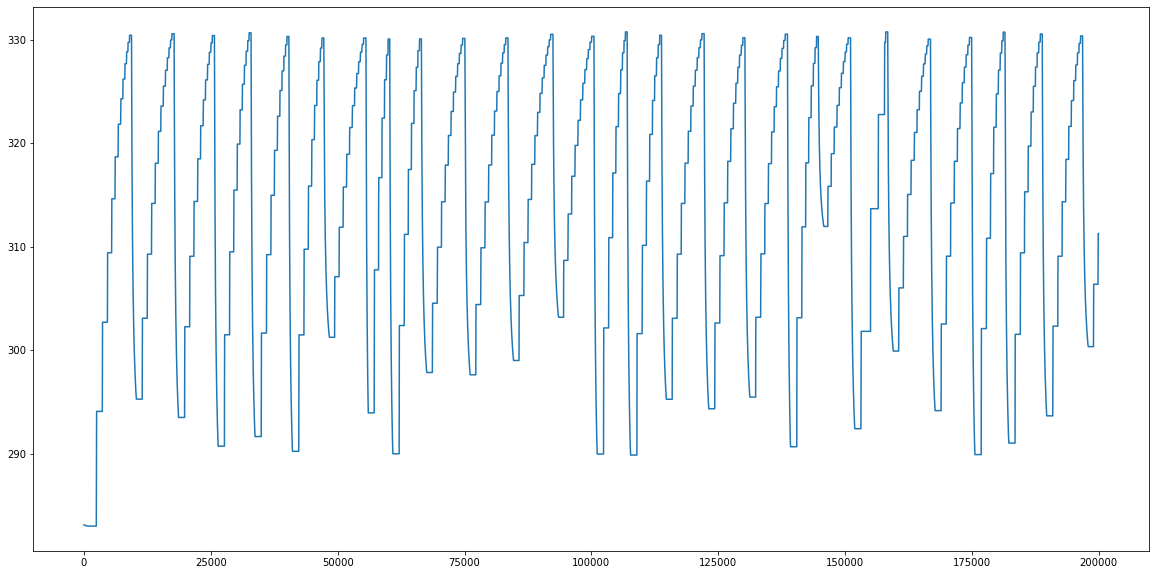

In [15]:
df1["RT_temperature.T"].plot(figsize=(20,10))

<AxesSubplot:>

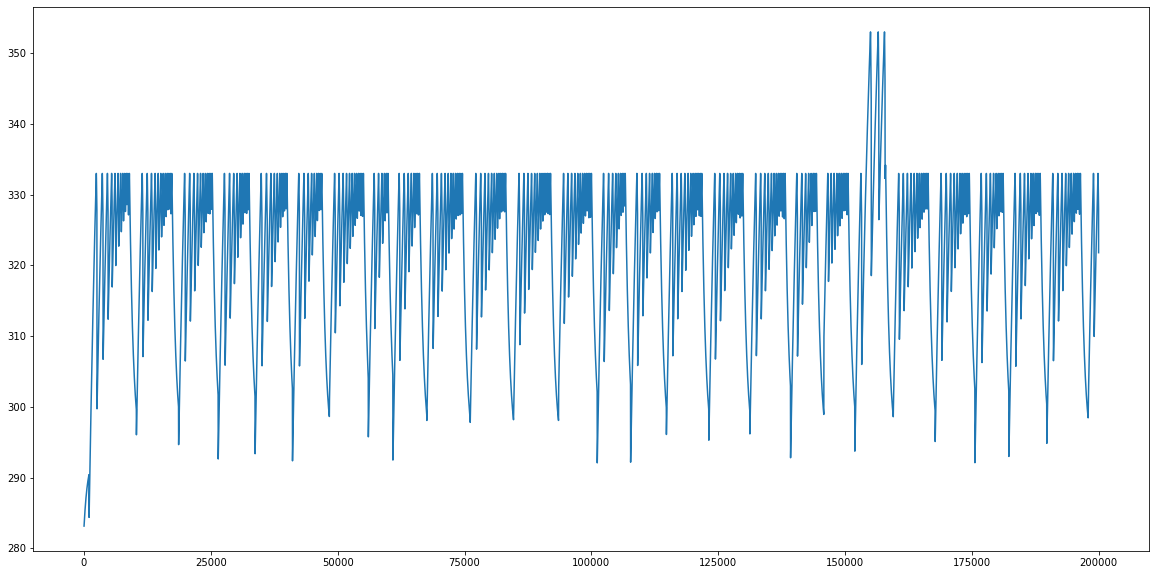

In [16]:
df1["HT_temperature.T"].plot(figsize=(20,10))

<AxesSubplot:>

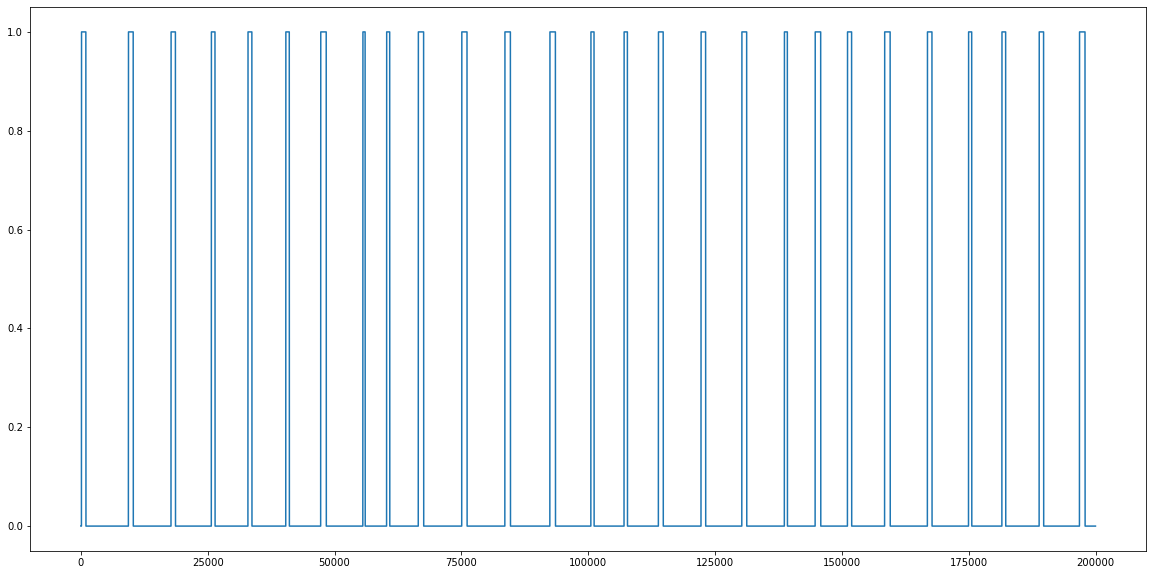

In [17]:
df1["inj_valve_act"].plot(figsize=(20,10))

<AxesSubplot:>

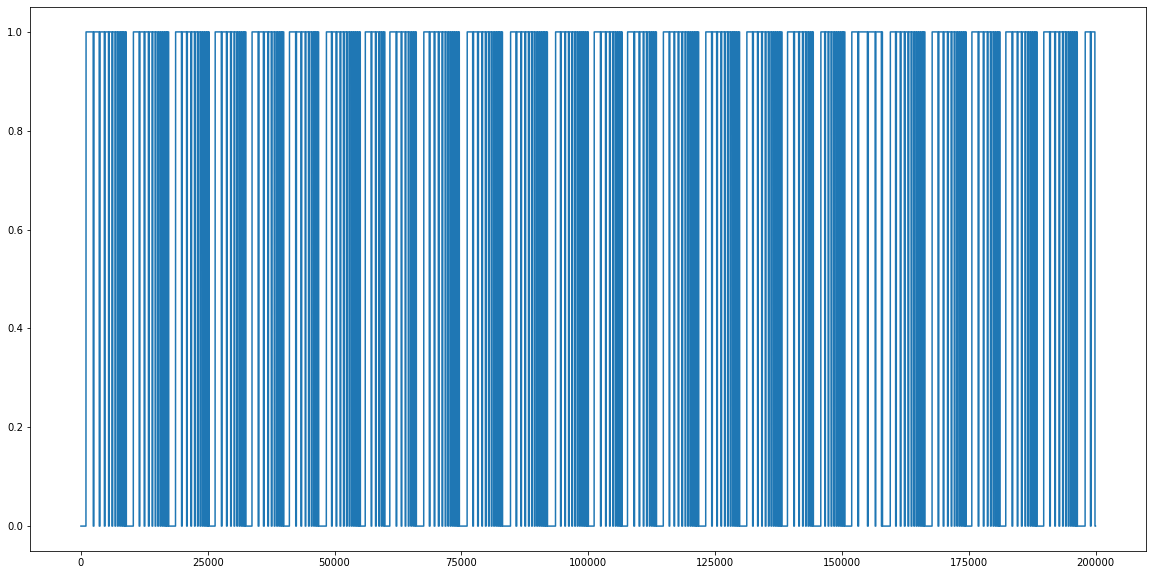

In [18]:
df1["heater_act"].plot(figsize=(20,10))

In [19]:
df1["ATTACK"].value_counts()

0.0    196399
1.0      3582
Name: ATTACK, dtype: int64

In [20]:
df_att = df1[df1["ATTACK"] == 1.0]

In [21]:
df_att

,Time,RT_level_ini,DANGER,FAULT,RT_temperature.T,HT_temperature.T,RT_level,out_valve_act,dT_rand,inv_valve_act,...,boundary.m_flow_in,dir_valve_act,dt_rand,C_level,C_temperature.T,heater_act,HT_level,ATTACK,limiter1.y,dL_rand
153985,"01-02-1970, 09:46:25",2.150586,0.0,0.0,301.834229,328.286469,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153986,"01-02-1970, 09:46:26",2.150586,0.0,0.0,301.834229,328.314697,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153987,"01-02-1970, 09:46:27",2.150586,0.0,0.0,301.834229,328.342957,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153988,"01-02-1970, 09:46:28",2.150586,0.0,0.0,301.834229,328.371185,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
153989,"01-02-1970, 09:46:29",2.150586,0.0,0.0,301.834229,328.399414,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,1.349284,1.386225,329.950134,1.0,0.6,1.0,113.492844,-0.198828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157978,"01-02-1970, 10:52:58",2.150586,1.0,0.0,329.740173,334.059601,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828
157979,"01-02-1970, 10:52:59",2.150586,1.0,0.0,329.740173,334.085938,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828
157980,"01-02-1970, 10:53:00",2.150586,1.0,0.0,329.740173,334.112244,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828
157981,"01-02-1970, 10:53:01",2.150586,1.0,0.0,329.740173,334.138550,1.650586,0.0,-0.198828,0.0,...,0.0,0.0,-2.016388,1.386225,329.950134,1.0,0.6,1.0,79.836113,-0.198828


In [22]:
attack = list(df_att["Time"])

In [23]:
list1 = df_att.index

In [24]:
df_danger = df1[df1["DANGER"] == 1.0]

In [25]:
list2= df_danger.index

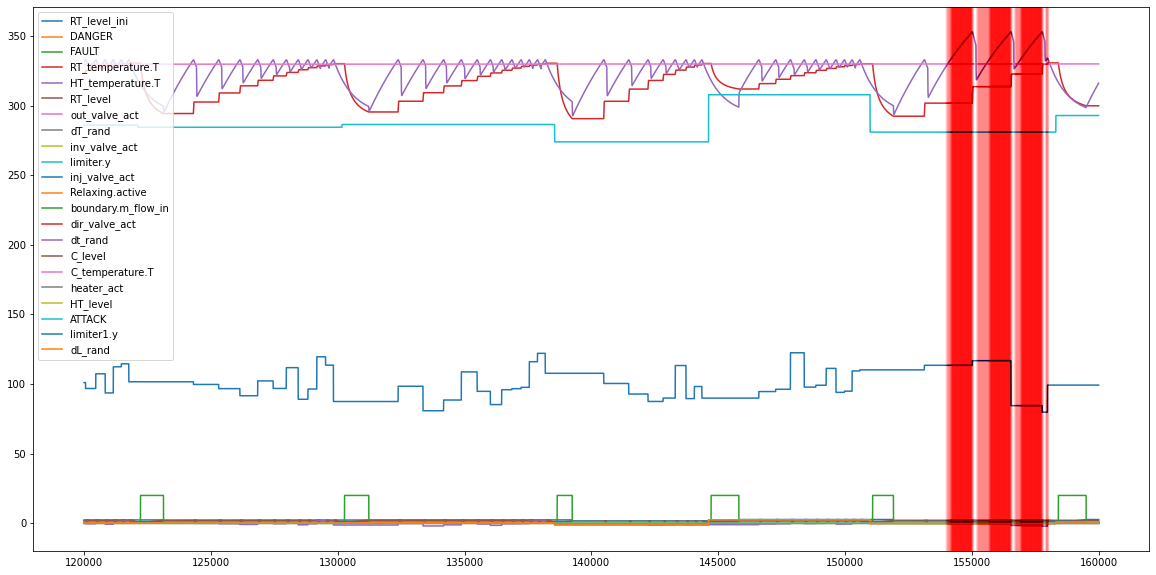

In [26]:
df1[120000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.005)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.002)     
plt.legend(loc='upper left')    
plt.show()

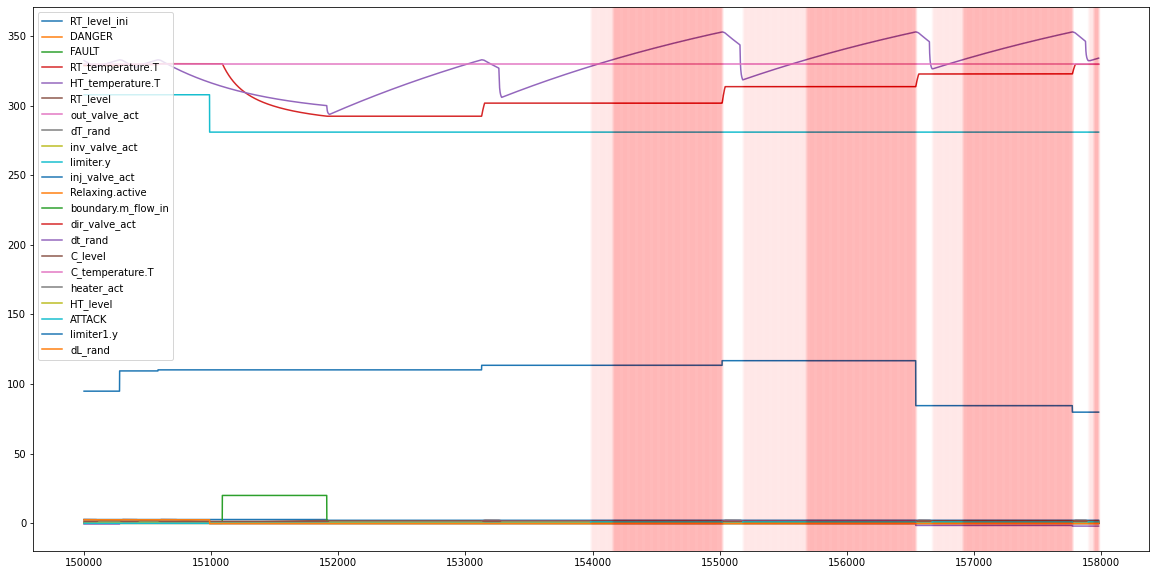

In [27]:
df1[150000:157982].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-',color = "r", lw=3, alpha=0.005)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.007)    
plt.legend(loc='upper left')    
plt.show()

Аномалии связанные с изменение максимального уровня жидкости приемного бака (RT)

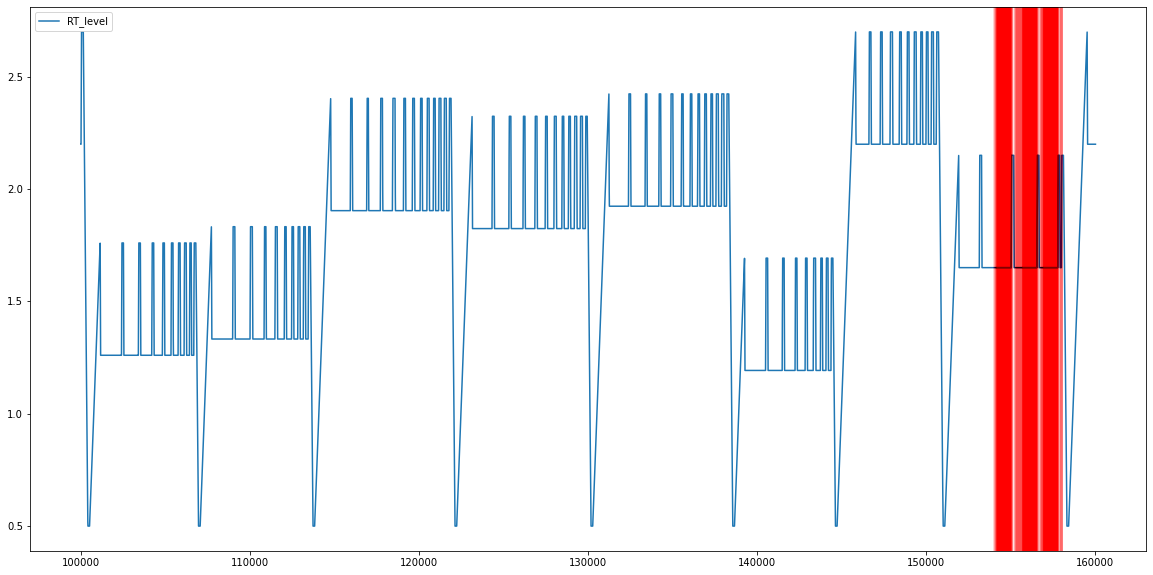

In [28]:
df1["RT_level"][100000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-',color = "r", lw=3, alpha=0.003)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.007)    
plt.legend(loc='upper left')    
plt.show()

Аномалии связанные с изменением максимальной температуры нагревательного бака (HT)

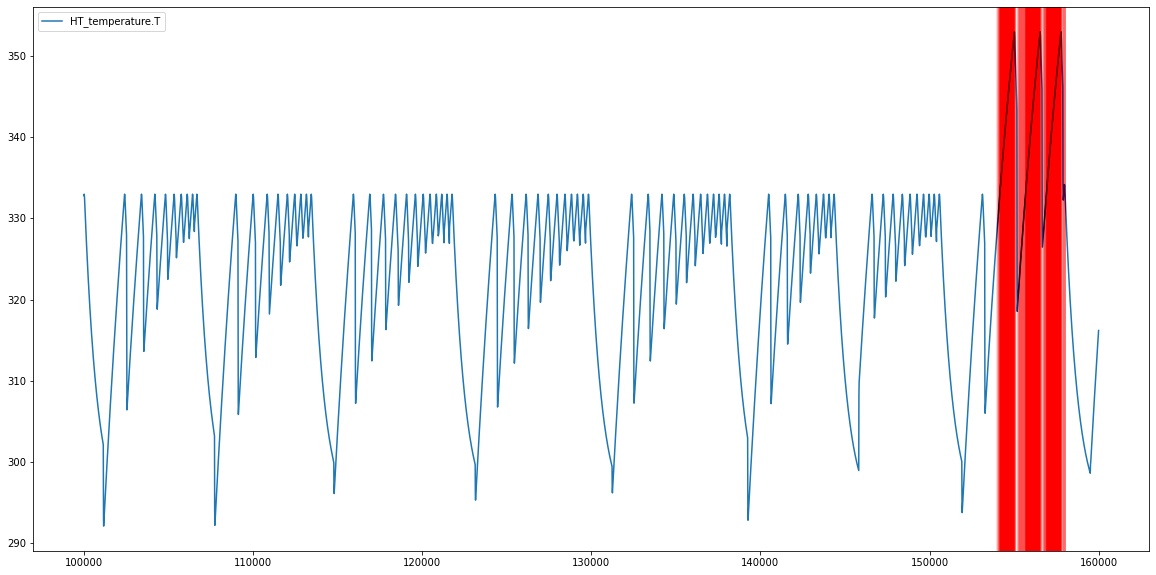

In [29]:
df1["HT_temperature.T"][100000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-',color = "r", lw=3, alpha=0.003)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.007)    
plt.legend(loc='upper left')    
plt.show()

Аномалии связанные с изменением значения времени простоя системы

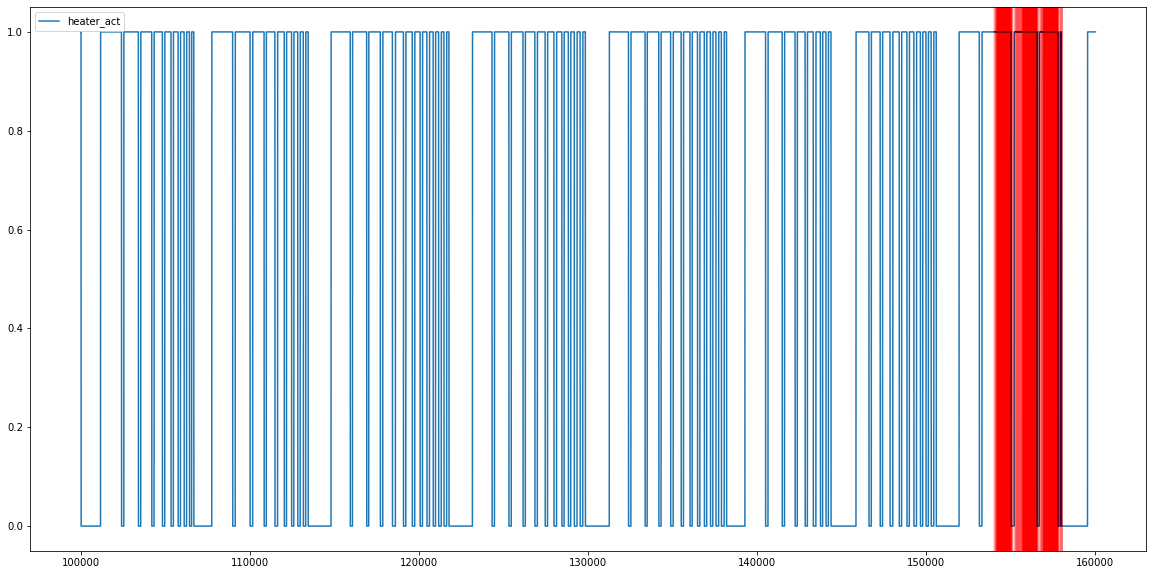

In [30]:
df1["heater_act"][100000:160000].plot(figsize=(20,10))
list1 = df_att.index
for xc in list1:
    plt.axvline(x=xc, ls='-',color = "r", lw=3, alpha=0.002)
for xc in list2:
    plt.axvline(x=xc, ls='-', color = "r", lw=3, alpha=0.007)    
plt.legend(loc='upper left')    
plt.show()